In [1]:
from keras.datasets import imdb

In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 0s 0us/step


In [3]:
#train_data[0]

In [4]:
#train_labels[0]

In [5]:
#max([max(sequence) for sequence in train_data])

In [6]:
word_index = imdb.get_word_index() # world_index는 단어와 정수 인덱스를 매핑한 딕셔너리입니다.
# print(word_index)
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]]) # 리뷰를 디코딩합니다. 0, 1, 2는 '패딩', '문서 시작', '사전에 없음'을 위한 인덱스이므로 3을 뺍니다.
# print(decoded_review)

1646592/1641221 [==============================] - 0s 0us/step


정수 시퀀스를 이진 행렬로 인코딩하기

In [7]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension)) #크기가 (len(sequences), dimension)이고, 모든 원소가 0인 행렬로 만듭니다.
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1. #result[i]에서 특정 인덱스의 위치를 1로 만듭니다.
  return results
# end of def


x_train = vectorize_sequences(train_data) #훈련데이타를 벡트로 변환합니다.
x_test = vectorize_sequences(test_data)

In [8]:
#x_train[0]

In [9]:
#x_test[0]

레이블은 쉽게 벡터로 바꿀 수 있습니다.

In [10]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32') 

In [11]:
#y_train

In [12]:
#y_test

모델의 정의

In [13]:
from keras import models, layers, activations, optimizers, losses, metrics

model = models.Sequential()
model.add(layers.Dense(32, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(32, activation='tanh'))
model.add(layers.Dense(16, activation='tanh'))
model.add(layers.Dense(1, activation='sigmoid'))

In [14]:
model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001), loss='mse', metrics=[metrics.binary_accuracy])

검증 세트 준비하기

In [15]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

모델 훈련하기

In [16]:
#history = model.fit(x=partial_x_train, y=partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))
history = model.fit(x=partial_x_train, y=partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))
results = model.evaluate(x_test, y_test)

Epoch 1/20
30/30 [==============================] - 2s 51ms/step - loss: 0.1546 - binary_accuracy: 0.7791 - val_loss: 0.1282 - val_binary_accuracy: 0.8174
Epoch 2/20
30/30 [==============================] - 1s 37ms/step - loss: 0.0700 - binary_accuracy: 0.9101 - val_loss: 0.0835 - val_binary_accuracy: 0.8847
Epoch 3/20
30/30 [==============================] - 1s 38ms/step - loss: 0.0509 - binary_accuracy: 0.9353 - val_loss: 0.0859 - val_binary_accuracy: 0.8839
Epoch 4/20
30/30 [==============================] - 1s 38ms/step - loss: 0.0372 - binary_accuracy: 0.9543 - val_loss: 0.0937 - val_binary_accuracy: 0.8807
Epoch 5/20
30/30 [==============================] - 1s 38ms/step - loss: 0.0290 - binary_accuracy: 0.9643 - val_loss: 0.0992 - val_binary_accuracy: 0.8763
Epoch 6/20
30/30 [==============================] - 1s 38ms/step - loss: 0.0235 - binary_accuracy: 0.9719 - val_loss: 0.1164 - val_binary_accuracy: 0.8583
Epoch 7/20
30/30 [==============================] - 1s 37ms/step - los

In [17]:
#print(results)

In [18]:
history_dict =  history.history
history_dict.keys()

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

In [19]:
#print(history_dict)

훈련과 검증 손실 그래프 그리기


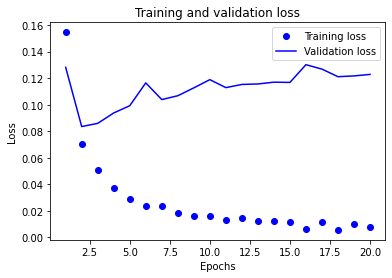

In [20]:
import matplotlib.pyplot as plt

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss') #'bo'는 파란색 점을 의미
plt.plot(epochs, val_loss, 'b', label='Validation loss') #'b'는 파란색 실선을 의미합니다.

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

훈련과 검증 정확도 그리기

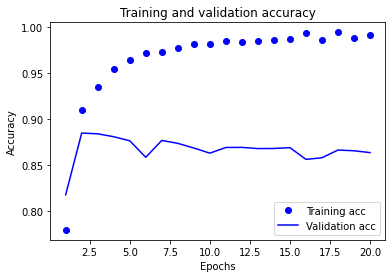

In [21]:
plt.clf() #그래프 초기화
acc = history_dict['binary_accuracy']
val_acc = history_dict['val_binary_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [22]:
model.predict(x_test)

array([[0.00410137],
       [0.99857366],
       [0.37149334],
       ...,
       [0.00214577],
       [0.0031687 ],
       [0.7672645 ]], dtype=float32)